<a href="https://colab.research.google.com/github/S-47/chronic_kidney_disease/blob/main/ML_chronic_Kidney_disease_deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
columns=pd.read_csv('/content/drive/MyDrive/data_description.txt')
columns=columns.reset_index()

In [5]:
columns

,index,1. Features:
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [6]:
columns.columns=['cols','abb_col_names']
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [7]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.columns=columns['abb_col_names'].values

In [9]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [11]:
def convert_dtype(df, feature):
 df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [12]:
features=['packed cell volume', 'white blood cell count', 'red blood cell count']

for feature in features:
  convert_dtype(df, feature)

In [13]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [14]:
df.drop('id', axis=1, inplace=True)

**EXTRACT NUMERICAL & CATEGORICAL FEATURES**

In [15]:
def extract_cat_num(df):
  cat_col=[col for col in df.columns if df[col].dtype=='object']
  num_col=[col for col in df.columns if df[col].dtype!='object']
  return cat_col, num_col


In [16]:
cat_col, num_col=extract_cat_num(df)

In [17]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [18]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

total unique categories in our categorical features to check if any dirtiness in data or not

In [19]:
for col in cat_col:
  print('{} has {} values'.format(col,df[col].unique()))
  print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




We need to correct 2 features and the target variable which contain certain discrepancy in some values.

In [20]:
df['diabetes mellitus'].replace(to_replace='\tno', value='no', inplace=True)
df['diabetes mellitus'].replace(to_replace='\tyes', value='yes', inplace=True)
df['coronary artery disease'].replace(to_replace='\tno', value='no', inplace=True)
df['class']=df['class'].replace(to_replace='ckd\t', value='ckd')

In [21]:
for col in cat_col:
  print('{} has {} values'.format(col,df[col].unique()))
  print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




In [22]:
len(num_col)

14

**CHECKING FEATURES DISTRIBUTION**

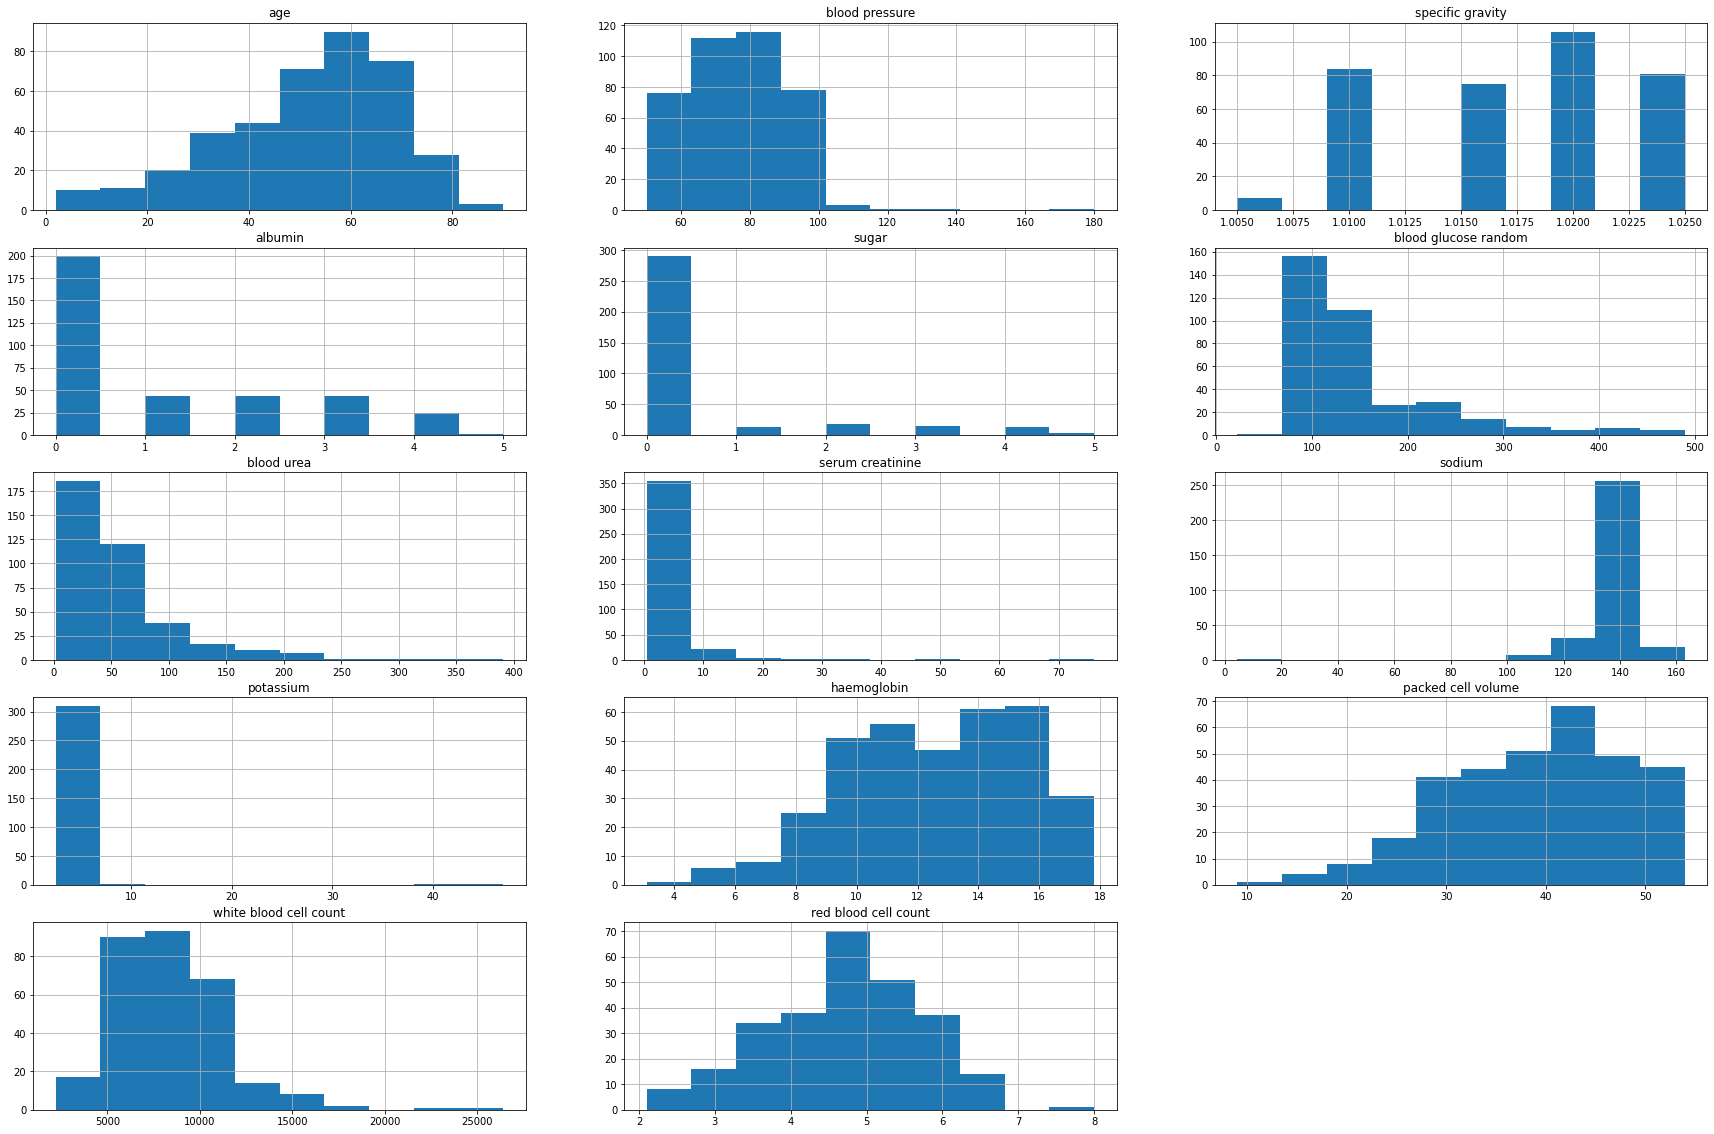

In [23]:
plt.figure(figsize=(30,20))

for i, feature in enumerate(num_col):
  plt.subplot(5,3,i+1)
  df[feature].hist()
  plt.title(feature)

In [24]:
len(cat_col)

11

In [25]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

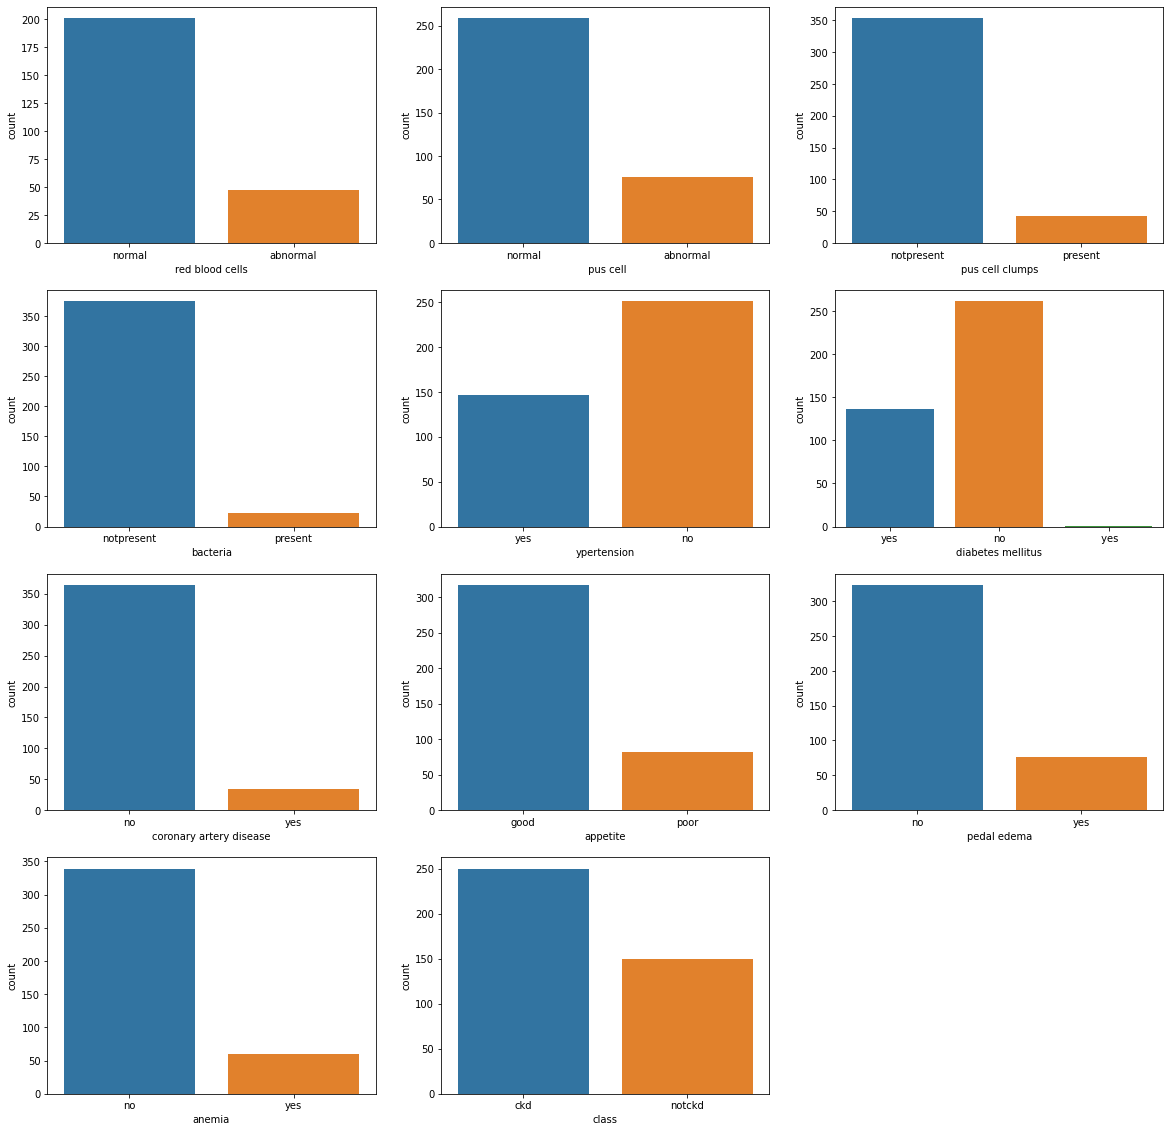

In [26]:
import warnings
warnings.filterwarnings("ignore")



plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

<AxesSubplot:xlabel='class', ylabel='count'>

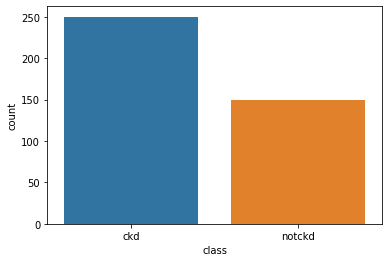

In [27]:
sns.countplot(df['class'])

**CORRELATIONS**

<AxesSubplot:>

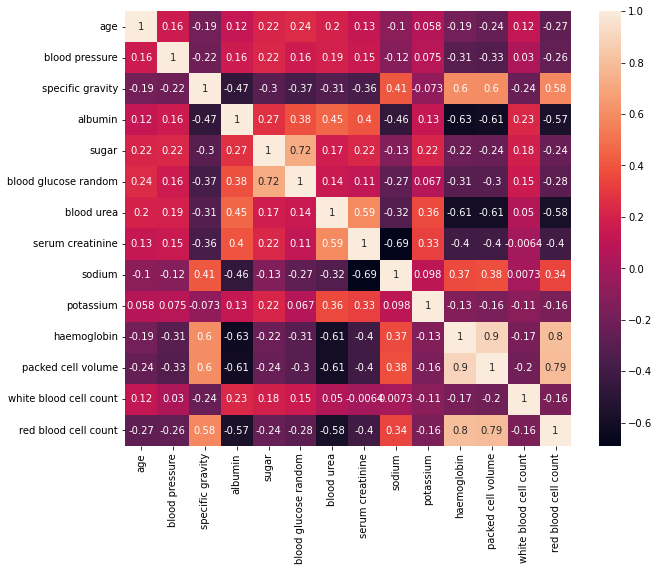

In [28]:
plt.figure(figsize=(10,8))
df.corr()
sns.heatmap(df.corr(), annot=True)

In [29]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [30]:
import plotly.express as px

In [31]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [32]:
px.violin(df,y='red blood cell count',x="class", color="class")

In [33]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [34]:
px.scatter(df, x='haemoglobin', y='packed cell volume')

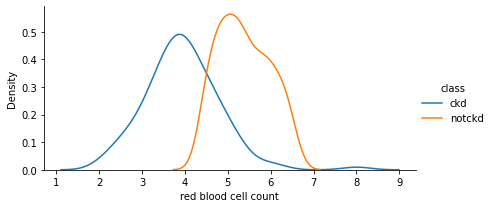

In [35]:
grid=sns.FacetGrid(df, hue='class', aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

In [36]:
def violin(col):
  fig=px.violin(df,y=col, x='class', color='class', box=True)
  return fig.show()

In [37]:
def scatters(col1, col2):
  fig=px.scatter(df, x=col1 , y=col2, color='class')
  return fig.show()


In [38]:
def kde_plot(feature):
  grid=sns.FacetGrid(df, hue='class', aspect=2)
  grid.map(sns.kdeplot, feature)
  grid.add_legend()


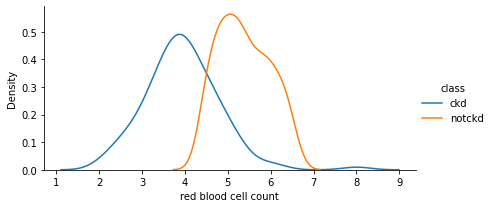

In [39]:
kde_plot('red blood cell count')

In [40]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

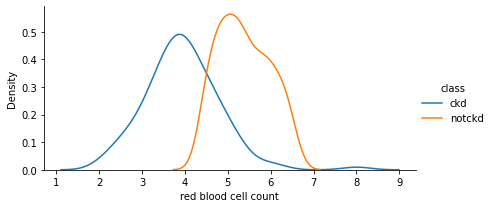

In [41]:
kde_plot('red blood cell count')

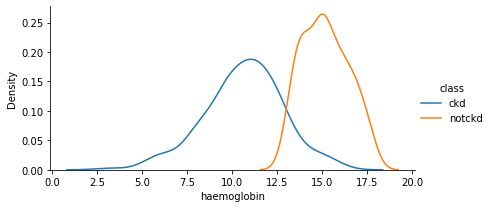

In [42]:
kde_plot('haemoglobin')

In [43]:
scatters('red blood cell count', 'packed cell volume')

In [44]:
scatters('packed cell volume', 'haemoglobin')

In [45]:
violin('red blood cell count')

In [46]:
violin('packed cell volume')

**FILLING MISSING WITH RANDOM VALUE**

In [47]:
df.isna().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed cell volume          71
white blood cell count     106
red blood cell count       131
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [48]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [49]:
data=df.copy()

In [50]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [51]:
data['red blood cells'].dropna().sample()

132    normal
Name: red blood cells, dtype: object

In [52]:
data['red blood cells'].isnull().sum()

152

In [53]:
random_sample=data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())
random_sample

157      normal
273      normal
66     abnormal
221      normal
246    abnormal
         ...   
369      normal
73     abnormal
226    abnormal
314      normal
189    abnormal
Name: red blood cells, Length: 152, dtype: object

In [54]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [55]:
random_sample.index

Int64Index([157, 273,  66, 221, 246,  35, 358, 210, 263,  33,
            ...
            359, 380, 281, 248, 323, 369,  73, 226, 314, 189],
           dtype='int64', length=152)

In [56]:
random_sample.index=data[data['red blood cells'].isnull()].index

In [57]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [58]:
random_sample

0        normal
1        normal
5      abnormal
6        normal
10     abnormal
         ...   
309      normal
322    abnormal
349    abnormal
350      normal
381    abnormal
Name: red blood cells, Length: 152, dtype: object

In [59]:
data.loc[data['red blood cells'].isnull(), 'red blood cells']=random_sample

In [60]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [61]:
data['red blood cells'].isnull().sum()

0

<AxesSubplot:xlabel='red blood cells', ylabel='count'>

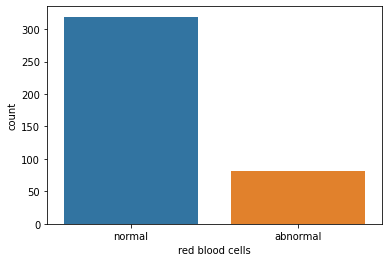

In [62]:
sns.countplot(data['red blood cells'])

In [63]:
def Random_value_imputation(feature):
  random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
  random_sample.index=data[data[feature].isnull()].index
  data.loc[data[feature].isnull(), feature]=random_sample


In [64]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [65]:
for col in num_col:
  Random_value_imputation(col)

In [66]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [67]:
data[cat_col].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [68]:
Random_value_imputation(' pus cell')

In [69]:
data['pus cell clumps'].mode()[0]

'notpresent'

In [70]:
def impute_mode(feature):
  mode=data[feature].mode()[0]
  data[feature]=data[feature].fillna(mode)

In [71]:
for col in cat_col:
  impute_mode(col)

In [72]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [73]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,86.0,...,38.0,6000.0,4.1,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [74]:
for col in cat_col:
  print('{} has {} categories'.format(col, data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


**LABEL ENCODING**

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le=LabelEncoder()

In [77]:
for col in cat_col:
  data[col]=le.fit_transform(data[col])

In [78]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,86.0,...,38.0,6000.0,4.1,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


**FEATURE IMPORTANCE**

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [80]:
ind_col=[col for col in data.columns if col!='class']
dep_col=[col for col in data.columns if col=='class']

In [81]:
X=data[ind_col]
y=data[dep_col]

In [82]:
X.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,86.0,...,11.3,38.0,6000.0,4.1,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,5.2,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


In [83]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [84]:
ordered_rank_features=SelectKBest(score_func=chi2, k=20)
ordered_feature=ordered_rank_features.fit(X,y)

ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7f31c7a62d30>)

In [85]:
ordered_feature.scores_

array([1.31205541e+02, 7.79603227e+01, 5.63547337e-03, 2.10329177e+02,
       9.55765766e+01, 9.30428422e+00, 1.50204126e+01, 2.52000000e+01,
       1.32000000e+01, 2.63945319e+03, 2.40748747e+03, 3.73732311e+02,
       2.87634216e+01, 5.51490988e+00, 1.32068660e+02, 3.19564195e+02,
       1.14966195e+04, 2.32871731e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [86]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])

In [87]:
datascores

,Score
0,131.205541
1,77.960323
2,0.005635
3,210.329177
4,95.576577
5,9.304284
6,15.020413
7,25.200000
8,13.200000
9,2639.453193


In [88]:
dfcols=pd.DataFrame(X.columns)
dfcols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [89]:
features_rank=pd.concat([dfcols, datascores], axis=1)
features_rank

,0,Score
0,age,131.205541
1,blood pressure,77.960323
2,specific gravity,0.005635
3,albumin,210.329177
4,sugar,95.576577
5,red blood cells,9.304284
6,pus cell,15.020413
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2639.453193


In [90]:
features_rank.columns=['features', 'Score']
features_rank

,features,Score
0,age,131.205541
1,blood pressure,77.960323
2,specific gravity,0.005635
3,albumin,210.329177
4,sugar,95.576577
5,red blood cells,9.304284
6,pus cell,15.020413
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2639.453193


In [91]:
features_rank.nlargest(10, 'Score')

,features,Score
16,white blood cell count,11496.619521
9,blood glucose random,2639.453193
10,blood urea,2407.487470
11,serum creatinine,373.732311
15,packed cell volume,319.564195
3,albumin,210.329177
14,haemoglobin,132.068660
0,age,131.205541
4,sugar,95.576577
18,ypertension,88.200000


In [92]:
selected_columns=features_rank.nlargest(10, 'Score')['features'].values

In [93]:
selected_columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [94]:
X_new=data[selected_columns]

In [95]:
X_new.head()

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,age,sugar,ypertension
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,86.0,18.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,51.0,0.0,0


In [96]:
len(X_new)

400

In [97]:
X_new.shape

(400, 10)

**MODEL BUILDING**

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test=train_test_split(X_new, y, random_state=0, test_size=0.25)

In [100]:
print(X_train.shape)

(300, 10)


In [101]:
print(X_test.shape)

(100, 10)


In [132]:
## check whether dataset is imbalance or not
y_train.value_counts()

class
0        188
1        112
dtype: int64

**LETS FIND THE BEST MODEL USING HYPERPARAMETER OPTIMIZATION**

In [103]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
params={
    'learning_rate':[0.05, 0.20, 0.25],
    'max_depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma': [0.0, 0.1, 0.2, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.7]
}

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
from xgboost import XGBClassifier

In [110]:
classifier=XGBClassifier()

In [116]:
random_search=RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [117]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [114]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [115]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [124]:
classifier=XGBClassifier( 
              colsample_bytree=0.3, 
              gamma=0.4,   learning_rate=0.05, 
              min_child_weight=5)

In [125]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [126]:
y_pred=classifier.predict(X_test)

In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [128]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[59  3]
 [ 0 38]]


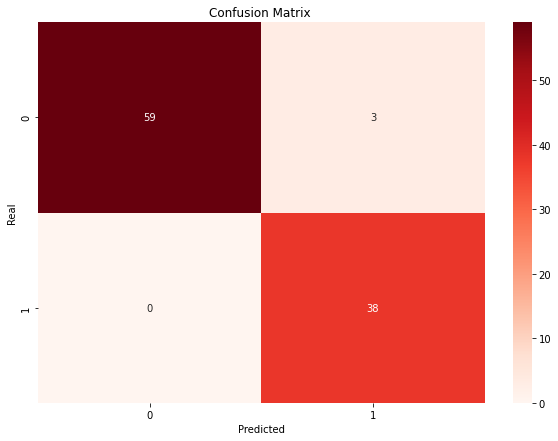

In [131]:
plt.figure(figsize=(10,7))
p = sns.heatmap(confusion, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [129]:
accuracy_score(y_test, y_pred)

0.97